# Simulation of Poisson processes

In [1]:
%load_ext autoreload
%autoreload 2

import arrival_process_simulation as arrival
import numpy as np
import matplotlib.pyplot as plt
import stochastic_plots as stoch
from scipy.stats import expon

## Simulation of a homogenous Poisson process: Method 1

In [2]:
# Parameters of the Poisson process

lambda_rate = 0.5
beta_scale = 1.0/lambda_rate
t0 = 0.0
t1 = 20.0
M = 3 

In [3]:
# Method 1: Simulation based on the generation of interarrival times

arrival_times = [ [] for _ in range(M) ]
beta_scale = 1.0/lambda_rate 
for m in range(M):
    # add exponentially distributed interarrival time 
    arrival_time = t0 + np.random.exponential(beta_scale)
    while arrival_time < t1:
        arrival_times[m].append(arrival_time)
        # add exponentially distributed interarrival time 
        arrival_time += np.random.exponential(beta_scale)

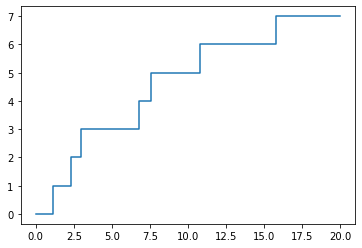

In [4]:
#  Plot count process

arrival_times_plot = np.hstack(([t0], 
                                arrival_times[0], 
                                [t1]))
states_plot = np.hstack((range(0, len(arrival_times[0]) + 1), 
                         len(arrival_times[0])))

_ = plt.step(arrival_times_plot, 
             states_plot, 
             where='post')

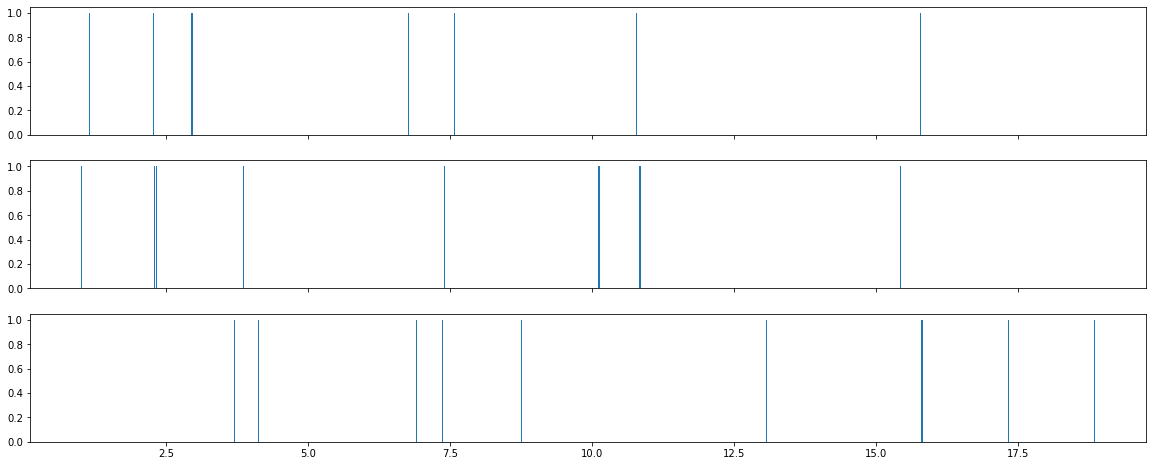

In [5]:
#  Plot arrival times

fig, axs = plt.subplots(M, sharex=True, num=1, figsize=(20,8))

for m in range(M):
     axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]), width = 0.02)

In [6]:
lambda_rate = 0.5
beta_scale = 1.0/lambda_rate
t0 = 0.0
t1 = 2000.0
M = 3 

In [7]:
## Method 2: Simulation based on the direct generation of arrival times
arrival_times = arrival.simulate_poisson(t0, t1, lambda_rate, M)

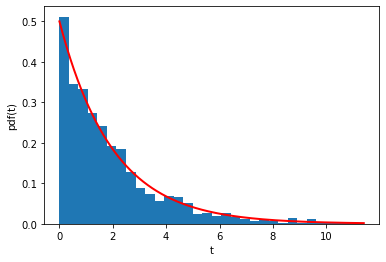

In [8]:
interarrival_times = np.diff(arrival_times[0])
def pdf(x): return expon.pdf(x, loc = 0.0, scale = beta_scale)

stoch.plot_pdf(interarrival_times, pdf, fig_num=2)
_ = plt.xlabel('t')
_ = plt.ylabel('pdf(t)')

## Simulation of a homogenous Poisson process: Method 2

In [9]:
lambda_rate = 0.5
beta_scale = 1.0/lambda_rate
t0 = 0.0
t1 = 2000.0
M = 3 

In [10]:
# Method 2: Simulation based on the direct generation of arrival times

arrival_times = arrival.simulate_poisson(t0, t1, lambda_rate, M)

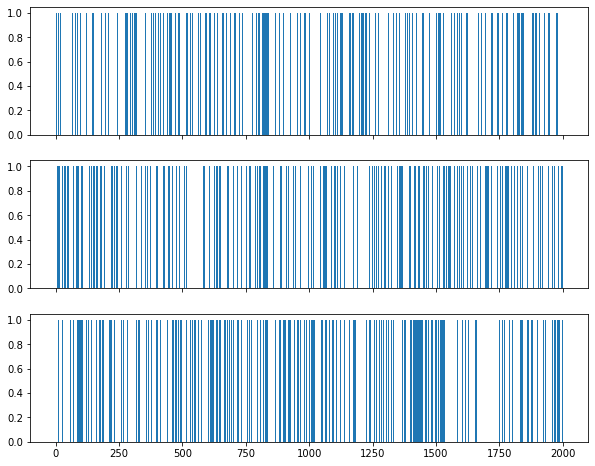

In [11]:
# Plot arrival times

fig, axs = plt.subplots(M, sharex=True, num=1, figsize=(10,8))
for m in range(M):
     axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))

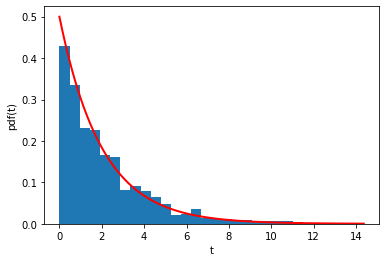

In [12]:
# Plot interarrival tiems 
interarrival_times = np.diff(arrival_times[0])
def pdf(x): return expon.pdf(x, loc = 0.0, scale = beta_scale)

stoch.plot_pdf(interarrival_times, pdf, fig_num=2)
_ = plt.xlabel('t')
_ = plt.ylabel('pdf(t)')

## Simulation of an inhomogeneous Poisson process: $\lambda(t) = \lambda$
## Method 1

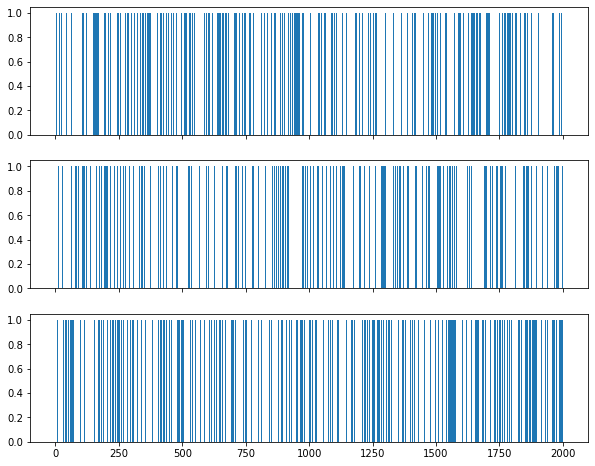

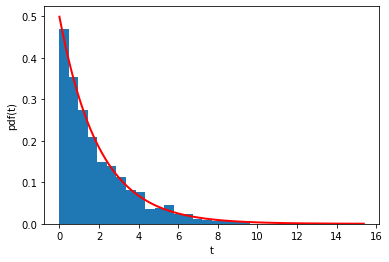

In [13]:
# Simulation of homogenous Poisson process with 
# the inhomogeneous generator (sanity check)

from scipy.integrate import quad
t0 = 0.0
t1 = 2000.0
M = 3 

lambda_rate = 0.5
beta_scale = 1.0/lambda_rate
def lambda_rate_fn(t): return lambda_rate
def integrated_lambda_rate_fn(s,t): return (lambda_rate * (t-s))

arrival_times = arrival.simulate_inhomogeneous_poisson(t0, t1, 
                                               lambda_rate_fn, 
                                               integrated_lambda_rate_fn, 
                                               M)
fig, axs = plt.subplots(M, sharex=True, num=1, figsize=(10,8))
for m in range(M):
    axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))

interarrival_times = np.diff(arrival_times[0])
def pdf(x): return expon.pdf(x, loc = 0.0, scale = beta_scale)

stoch.plot_pdf(interarrival_times, pdf, fig_num=2)
_ = plt.xlabel('t')
_ = plt.ylabel('pdf(t)')

## Simulation of an inhomogeneous Poisson process: sinusoidal $\lambda(t)$
## Method 1

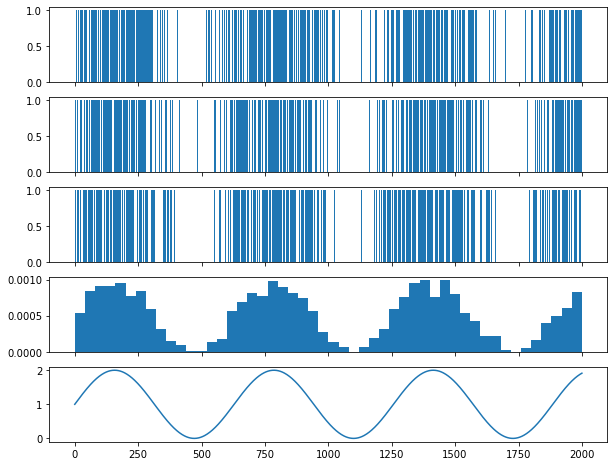

In [14]:
from scipy.integrate import quad

t0 = 0.0
t1 = 2000.0
M = 3 
def lambda_rate_fn(t): return 1.0001 + np.sin(0.01*t)
def integrated_lambda_rate_fn(s,t): return quad(lambda_rate_fn, s, t)[0]

arrival_times = arrival.simulate_inhomogeneous_poisson(t0, t1, 
                                               lambda_rate_fn, 
                                               integrated_lambda_rate_fn, 
                                               M)
fig, axs = plt.subplots(M+2, sharex=True, num=1, figsize=(10,8))
for m in range(M):
    axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))

n_plot = 1000
t_plot = np.linspace(t0,t1,n_plot)
_ = axs[M].hist(arrival_times[0], bins=50, density=True)
_ = axs[M+1].plot(t_plot, lambda_rate_fn(t_plot))

## Simulation of an inhomogeneous Poisson process: sinusoidal $\lambda(t)$
## Method 2

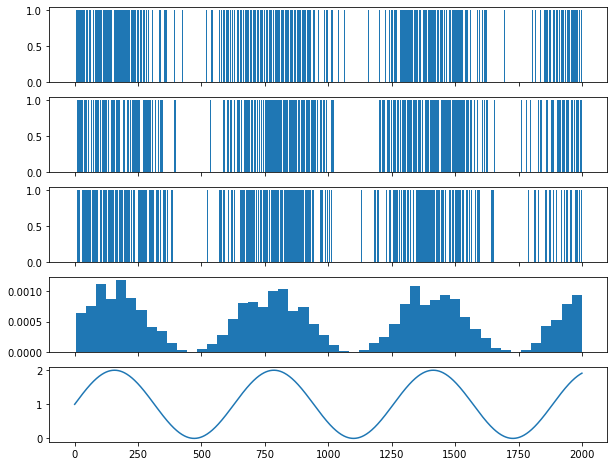

In [15]:
arrival_times = arrival.simulate_inhomogeneous_poisson_2(t0, t1, 
                                               lambda_rate_fn, 
                                               M)
fig, axs = plt.subplots(M+2, sharex=True, num=1, figsize=(10,8))
for m in range(M):
    axs[m].bar(arrival_times[m], np.ones_like(arrival_times[m]))

n_plot = 1000
t_plot = np.linspace(t0,t1,n_plot)
_ = axs[M].hist(arrival_times[0], bins=50, density=True)
_ = axs[M+1].plot(t_plot, lambda_rate_fn(t_plot))